In [150]:
import pandas as pd
import nltk
from collections import Counter
nltk.download('wordnet')
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
data_path = "..\\datasets\\04_Universities_with_city_wikipedia_page.csv"
df = pd.read_csv(data_path)
wiki_texts = df["Wikipedia Text"].tolist()
#wiki_texts = df["City wikipedia text"].tolist()
text = " ".join(wiki_texts)

[nltk_data] Downloading package wordnet to C:\Users\Ilina
[nltk_data]     Kirovska\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ilina
[nltk_data]     Kirovska\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
#preprocessing data
#text = wiki_texts[0]
#lowercase
text = text.lower()
#remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))
#tokenize
tokens = nltk.word_tokenize(text)
#lemmatize
wnl = WordNetLemmatizer()
tokens = [wnl.lemmatize(word) for word in tqdm(tokens)]
#get list of n-grams
ngrams = list(nltk.ngrams(tokens,4))

100%|██████████| 1296550/1296550 [00:11<00:00, 114907.32it/s]


In [152]:
#we will remove the n-grams that consist of only stop words (will affect mostly bigrams)
filtered_ngrams = [ngram for ngram in tqdm(ngrams) if any(word not in nltk.corpus.stopwords.words('english') for word in ngram)]
ngram_frequency = Counter(filtered_ngrams)

100%|██████████| 1296547/1296547 [19:04<00:00, 1132.51it/s]


{'of the university of': 767, 'at the university of': 422, 'of the faculty of': 384, 'q world university ranking': 325, 'in the field of': 324, 'is one of the': 291, 'categoryeducational institution established in': 256, 'categoryuniversities and college established': 256, 'and college established in': 256, 'the time higher education': 223, 'a member of the': 220, 'the faculty of law': 203, 'a well a the': 201, 'a part of the': 200, 'is a public research': 184, 'a public research university': 182, 'time higher education world': 181, 'list of university in': 180, 'is a member of': 174, 'higher education world university': 168, 'the faculty of medicine': 165, 'education world university ranking': 163, 'categorybuildings and structure in': 158, 'ranking of world university': 156, 'the faculty of science': 156, 'and the faculty of': 156, 'university in the world': 147, 'categoryuniversities and college in': 146, 'one of the most': 145, 'with the university of': 144, 'of science and technol

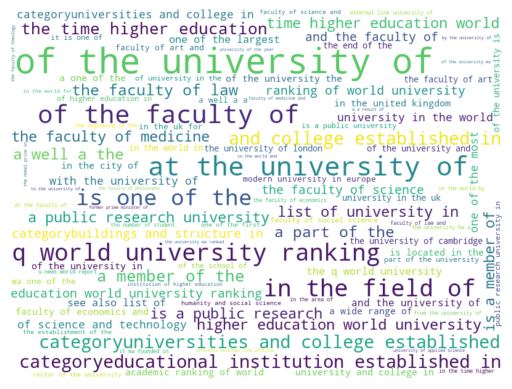

In [153]:
#create word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

most_common_ngrams = ngram_frequency.most_common(100) 
wordcloud_dict = {' '.join(key): value for key, value in most_common_ngrams}
print(wordcloud_dict)

wordcloud = WordCloud(width = 800, height = 600, background_color = 'white').generate_from_frequencies(wordcloud_dict)
wordcloud.to_file(".\\images\\4grams.png")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()